In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

# matplotlib.use("TkAgg")

# import matplotlib.pyplot as plt

HEX_SIZE = 0.87
def draw_hex(x, y, tileType, edgecolor = "black"):
    color = "white"
    if tileType == 0:
        color = "white"
    elif tileType == 1:
        color = "black"
    elif tileType == 2:
        color = "green"
    elif tileType == 3:
        color = "red"
    hexagon = RegularPolygon((x, y), numVertices=6, radius=HEX_SIZE, edgecolor=edgecolor, facecolor=color)
    plt.gca().add_patch(hexagon)

def draw_labyrinth(hex_coordinates):
    for hex_coord in hex_coordinates:
        draw_hex(*hex_coord)

    plt.axis('equal')
    plt.axis('off')
    
def draw_line(coordA, coordB):
    x_values = [coordA[0], coordB[0]]
    y_values = [coordA[1], coordB[1]]
    plt.plot(x_values, y_values, linewidth=2)
    
def arc_to_cartesian(arc):
    a = arc[0]
    r = arc[1]
    c = arc[2]
    x = HEX_SCALE * 0.75 * (2 * c + a )
    y = 1.333 * (2 * r + a) * HEX_SCALE
    return x, y

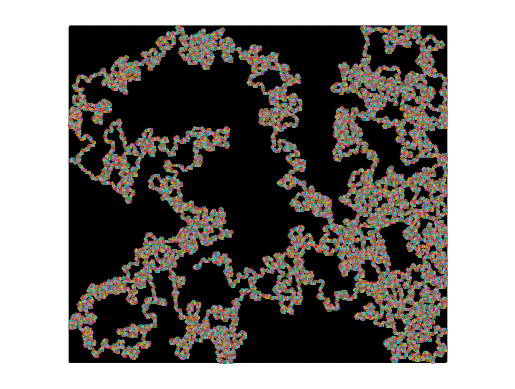

In [3]:
import random

i = random.randint(0, 50)

string = str(i)
if len(string) == 1:
    string = "0" + string

answer_path = "./solutions/extreme/labyrinth_" + string + ".txt"
file_path = "./labyrinths/extreme/labyrinth_" + string + ".json"


import json
import math

with open(file_path, "r") as file:
    data = json.load(file)

def getType(dict): 
    return dict["_jsontype_"]

def getRelative(x, y):
    if x < 0:
        x += SIZE
    if y < 0:
        y += SIZE
    if x >= SIZE:
        x -= SIZE
    if y >= SIZE:
        y -= SIZE
    return x, y

def getArc(x, y):
    return y % 2, int(math.floor(y / 2)) if int(math.floor(y / 2)) <= maxR else int(math.floor(y / 2)) - SIZE / 2, x if x <= maxC else x - SIZE

if not getType(data) == "Labyrinth":
    print("Error1")

HEX_SCALE = 1
SIZE = 1000
maxR = 0
maxC = 0

accessibleTiles0 = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1)]
accessibleTiles1 = [(-1, 0), (1, 0), (0, -1), (0, 1), (1, -1), (1, 1)]
visitedTiles = []
data1 = []
for tile in data["tiles"]:
    a = r = c = tileType = 0
    for attribute in tile:
        if getType(attribute) == "HexTile":
            a = attribute["a"]
            r = attribute["r"]
            c = attribute["c"]
        elif getType(attribute) == "TileType":
            if attribute["type"] == "TileType.NORMAL":
                tileType = 0
            elif attribute["type"] == "TileType.WALL":
                tileType = 1
            elif attribute["type"] == "TileType.START":
                tileType = 2
            elif attribute["type"] == "TileType.END":
                tileType = 3
    # if tileType == 2:
    #     print(2 * r + a)
    #     print(c)
    maxR = max(maxR, r)
    maxC = max(maxC, c)
    x = c
    y = 2 * r + a
    x, y = getRelative(x, y)
    # print(y, "", x, "", tileType)
    data1.append((HEX_SCALE * 0.75 * (2 * c + a), 1.333 * (2 * r + a) * HEX_SCALE, tileType))


with open(answer_path, 'r') as file:
    lines = file.readlines()

answerPath = [eval(line.strip()) for line in lines]

draw_labyrinth(data1)
for i in range(len(answerPath) - 1):
    draw_line(arc_to_cartesian(answerPath[i]), arc_to_cartesian(answerPath[i + 1]))
plt.savefig('plot_image.png')
plt.show()